# Прогнозирование размера чаевых на основе алгоритмов нечеткой логики

## Анализ предметной области

- Понятия
  - Нечеткое множество
  - Нечеткая логика
  - Чаевые
- Как выполнить прогнозирование?
- Какие технологии нужно использовать?
- Что будет входными данными?
- Что будет выходными данными?

## Чаевые

- Качество сервиса (1-10)
- Качество еды (1-10)
- Размер чаевых 0 - 25%

Основной целью создания программы является автоматизации процедуры установления размера чаевых на основе нечеткой логики.

В соответствии с поставленной целью, создаваемая система должна уметь решать следующие задачи:
- Считывание значений параметров по которым определяется размер чаевых;
- Расчет размера чаевых на основе нечеткой логики;
- Вывод прогноза размера чаевых.

## Входные данные

### Качество обслуживания
- Как вы оцениваете качество обслуживания по шкале от 0 до 10?
- Нечеткое множество (плохо, средне, отлично)

### Качество еды
- Насколько было вкусно по шкале от 0 до 10?
- Нечеткое множество (отвратительно, съедобно, великолепно)

## Выходные данные

### Чаевые
- Сколько оставить чаевых по шкале от 0% до 25%
- Нечеткое множество (мало, средне, много)

### Правила
- ЕСЛИ сервис отличный или качество еды великолепное, ТО, что размер чаевых будет высоким.
- ЕСЛИ сервис средний, ТОГДА размер чаевых будет средним.
- ЕСЛИ сервис плохой, а качество еды было низким. ТО, размер чаевых будет низким.


In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

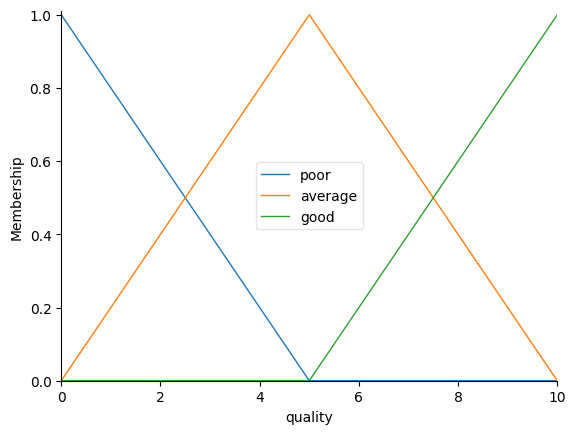

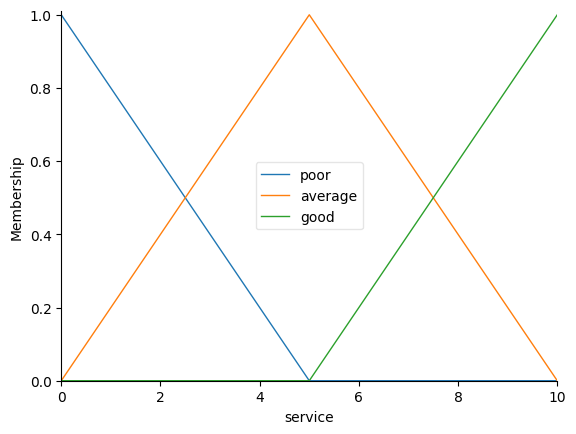

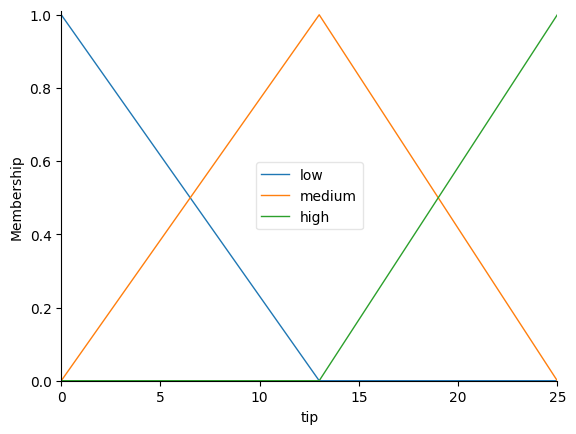

In [17]:
# Определяем лингвистические переменные

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Количество состояний переменной
quality.automf(3)
service.automf(3)

# Функции принадлежности
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Вывод на экран графиков функции принадлежности
quality.view()
service.view()
tip.view()

In [18]:
# Правила
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
#rule1.view()

In [19]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Ввод данных
tipping.input['quality'] = 3
tipping.input['service'] = 5

11.823963657013058
Risk profile membership:
- low:  0.4000 
- medium:  1.0000 
- high:  0.0000 


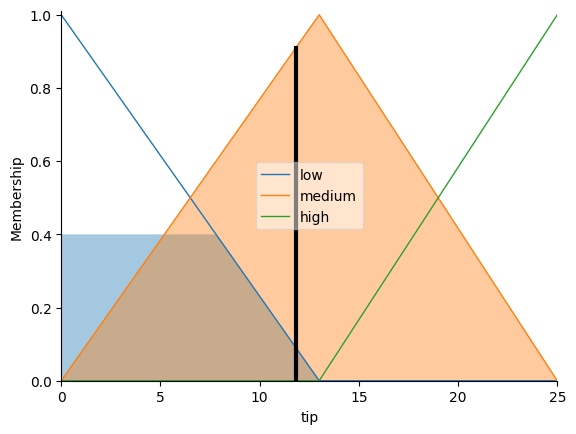

In [20]:
# Вычисление размера чаевых
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

print('Risk profile membership:')
for term_key, term_val in tip.terms.items():
    value = term_val.membership_value[tipping]
    print(f'- {term_key}: {value:7.4f} ')